In [1]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)


In [2]:
sales

,date,sales
0,2024-01-01,50.91
1,2024-01-02,48.06
2,2024-01-03,54.61
3,2024-01-04,56.33
4,2024-01-05,48.78
...,...,...
85,2024-03-26,83.40
86,2024-03-27,80.08
87,2024-03-28,81.05
88,2024-03-29,81.95


,hours_studied,marks,gender,subject,study_method,attempts
0,5.61,54.04,Male,English,Solo,2
1,2.92,30.00,Female,Science,Solo,2
2,6.50,70.46,Female,History,Group,3
3,6.88,52.76,Female,English,Group,3
4,1.10,30.00,Female,History,Solo,1
...,...,...,...,...,...,...
215,7.01,70.66,Female,English,Solo,1
216,6.08,67.32,Male,Math,Group,2
217,7.67,65.64,Male,Science,Solo,1
218,4.69,41.90,Male,Math,Solo,1


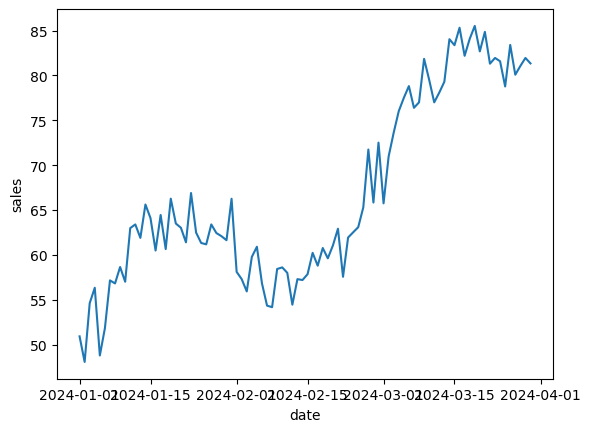

In [3]:
# Using sales, draw a lineplot of date vs sales.
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=sales,x='date',y='sales')
students

<Axes: xlabel='hours_studied', ylabel='marks'>

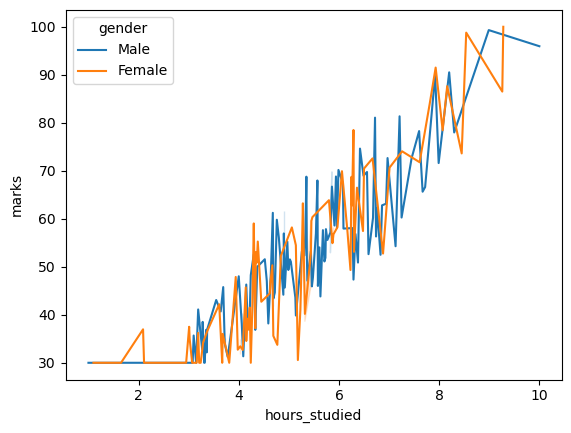

In [4]:
# From students, plot hours_studied vs marks and color by gender.
sns.lineplot(data=students,x='hours_studied',y='marks',hue='gender')

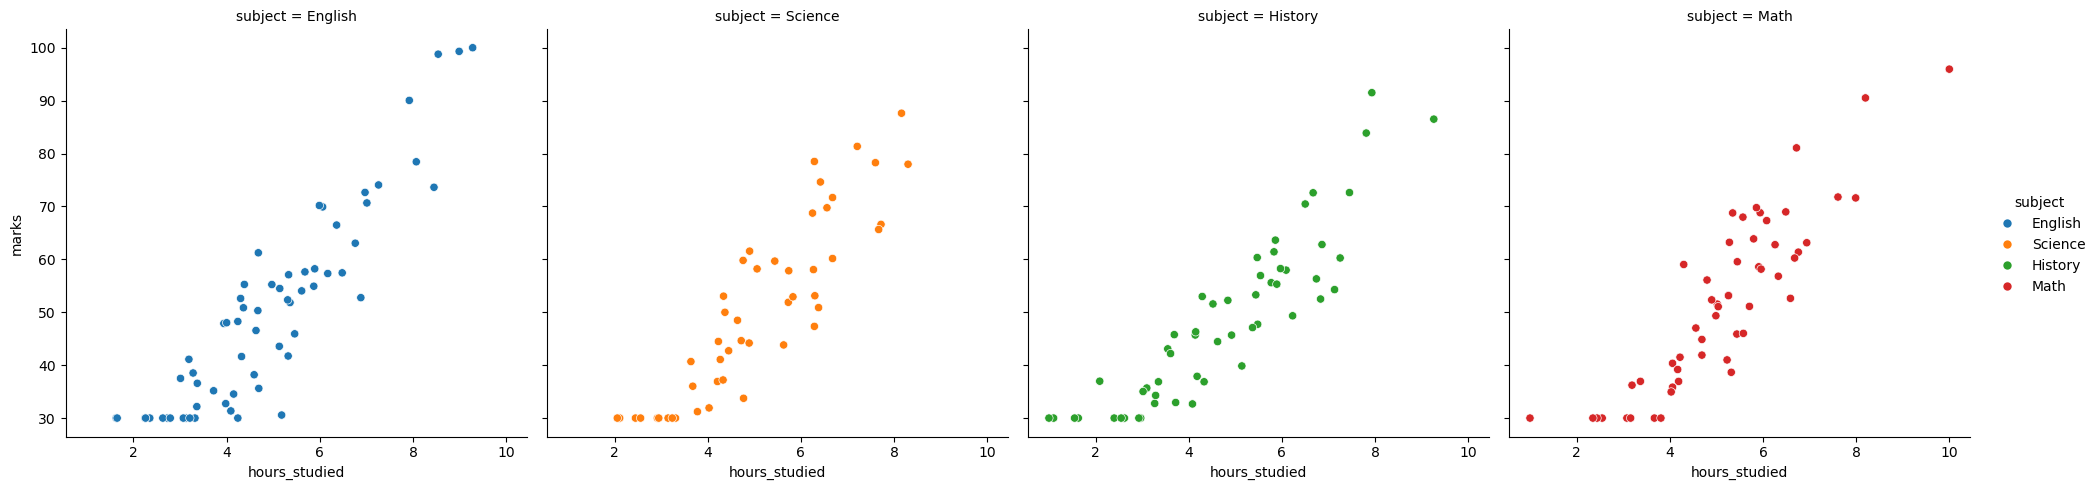

In [55]:
# Create a grid of scatterplots (hours_studied vs marks) faceted by subject.
sns.relplot(data=students,x='hours_studied',y='marks',hue='subject',kind='scatter',col='subject')
plt.show()

<Axes: xlabel='marks', ylabel='Density'>

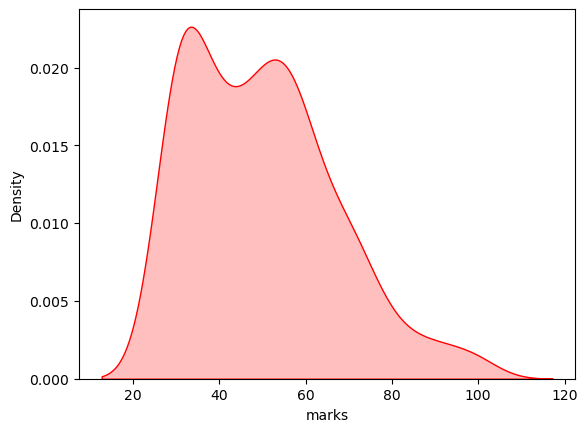

In [13]:
# Plot a histogram of marks with a KDE overlay.

sns.kdeplot(data=students,x='marks',color='red',fill=True)

In [ ]:
# Show the KDE curve for hours_studied.


<Axes: xlabel='hours_studied', ylabel='Density'>

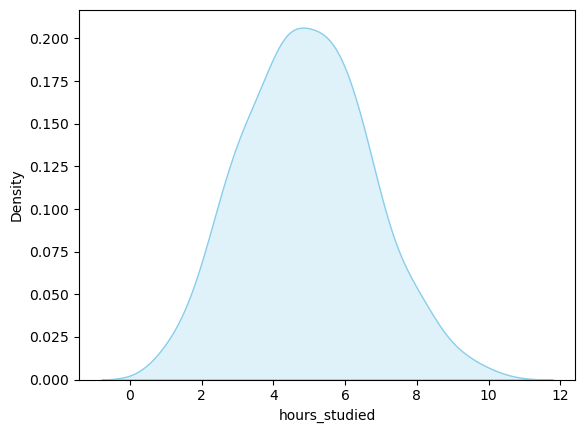

In [18]:
sns.kdeplot(data=students,x='hours_studied',color='skyblue',fill=True)

<Axes: xlabel='subject', ylabel='Count'>

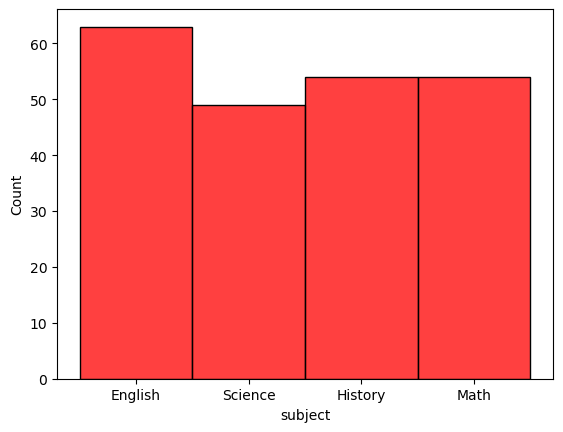

In [23]:
# Display the count of records per subject.
sns.histplot(data=students,x='subject',color='red')


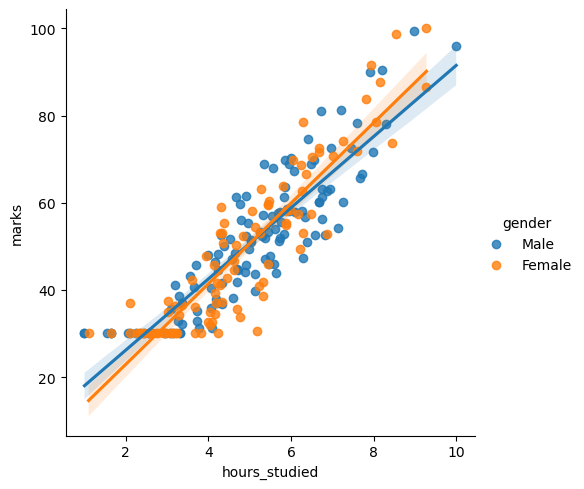

In [31]:
# Draw a regression line for hours_studied and marks.
sns.lmplot(data=students,x='hours_studied',y='marks',hue='gender')

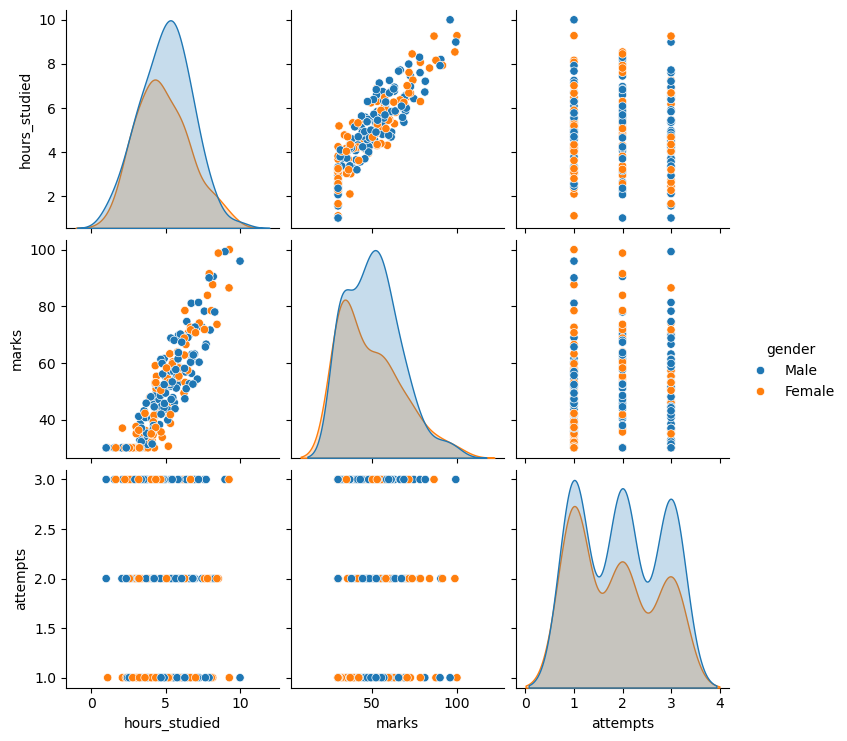

In [34]:
# Create a pairplot and a jointplot for students' dataset.
sns.pairplot(data=students,hue='gender',diag_kind='kde')

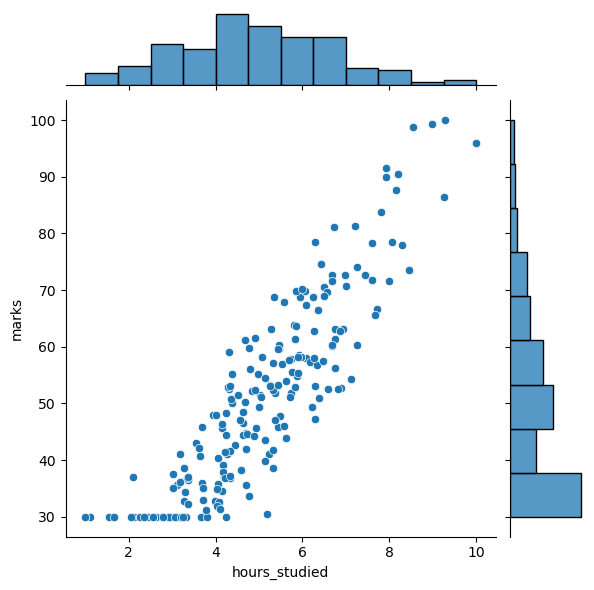

In [36]:
# Create a pairplot and a jointplot for students' dataset.
sns.jointplot(data=students,x='hours_studied',y='marks')

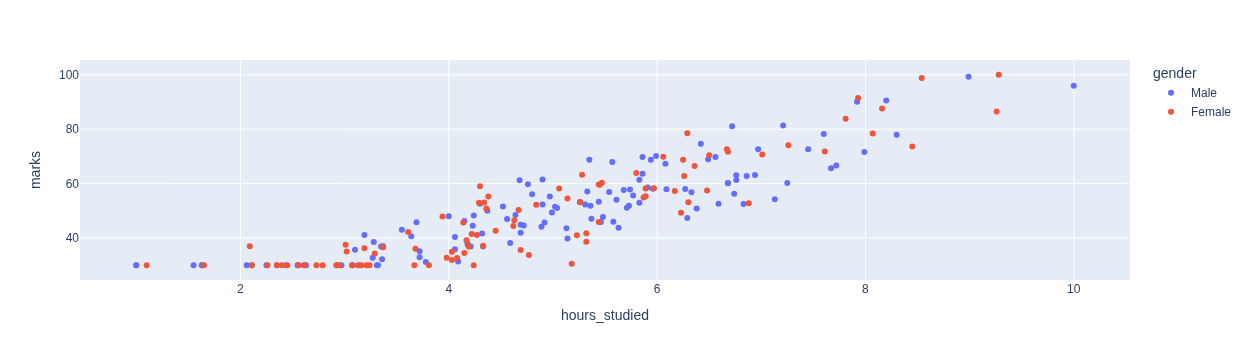

In [58]:
# Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.
import plotly.express as px
fig = px.scatter(students,x='hours_studied',y='marks',color='gender')
fig.show()


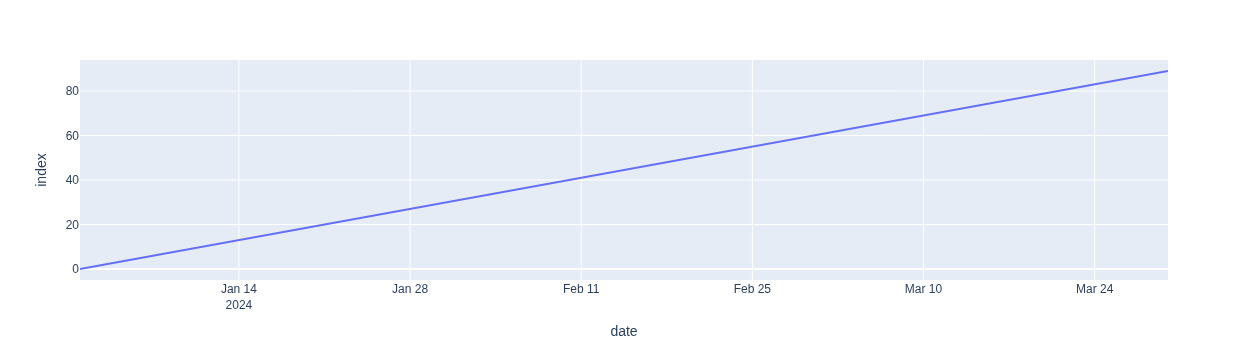

In [61]:
# Draw a line chart of sales over date and a histogram of marks using Plotly.

fig = px.line(sales,x='date')
fig.show()

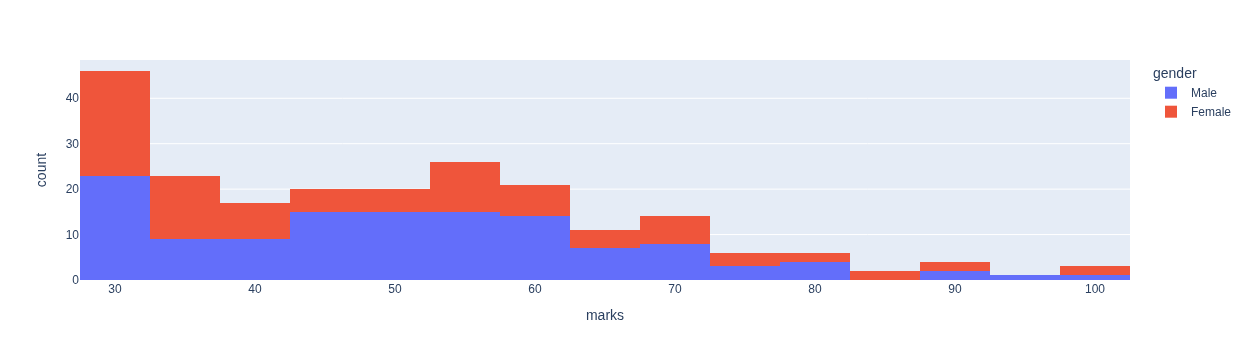

In [64]:
fig = px.histogram(students,x='marks',color='gender')
fig.show()